<a href="https://colab.research.google.com/github/mayurishou/practice_projects/blob/main/Analiza_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import numpy as np

from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


Wstępne przygotowanie danych - Preprocessing data

---



In [2]:
#data of average energy consumption per capita in Poland
df = pd.read_csv('/content/Zuzycie_energii_na_1_mieszkanca.csv', sep=';')
df.head()
#Zmienna - variable
#Typ_informacji - information type
#Charekter_miejscowosci - character of the place (Ogółem - Overall, Miasto - Cities, Wieć - Villages)
#Jednostka_terytorialna - voivodeship
#Rok - Year
#Wartosc - Value of average energy consumption per capita in Poland

,Zmienna,Typ_informacji,Charakter_miejscowosci,Jednostka_terytorialna,Rok,Wartosc,Flaga
0,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Ogółem,POLSKA,1995,"362,8",NaN
1,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Miasto,POLSKA,1995,"586,4",NaN
2,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,POLSKA,1995,0,(—)
3,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Ogółem,MAŁOPOLSKIE,1995,"319,2",NaN
4,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Miasto,MAŁOPOLSKIE,1995,"627,0",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Zmienna                 1326 non-null   object
 1   Typ_informacji          1326 non-null   object
 2   Charakter_miejscowosci  1326 non-null   object
 3   Jednostka_terytorialna  1326 non-null   object
 4   Rok                     1326 non-null   int64 
 5   Wartosc                 1326 non-null   object
 6   Flaga                   85 non-null     object
dtypes: int64(1), object(6)
memory usage: 72.6+ KB


In [4]:
wiersze0 = df[df['Wartosc'] == '0'] #rows with Value = 0
wiersze0
#informacje kontekstowe:
#Nie mamy danych dotyczących wartości zużycia energii elektrycznej na 1 mieszkańca na wsiach do 1999 roku,
#Pomimo, że 28 czerwca 1950 roku sejm PRL uchwalił ustawę o powszechnej elektryfikacji wsi i osiedli
#context informations:
#We do not have data on the electricity consumption per capita in rural areas until 1999. On June 28, 1950,
#Even though the Polish People's Republic Sejm passed a law on the universal electrification of villages and settlements.

,Zmienna,Typ_informacji,Charakter_miejscowosci,Jednostka_terytorialna,Rok,Wartosc,Flaga
2,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,POLSKA,1995,0,(—)
5,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,MAŁOPOLSKIE,1995,0,(—)
8,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,ŚLĄSKIE,1995,0,(—)
11,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,LUBUSKIE,1995,0,(—)
14,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,WIELKOPOLSKIE,1995,0,(—)
...,...,...,...,...,...,...,...
242,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,ŚWIĘTOKRZYSKIE,1999,0,(—)
245,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,LUBELSKIE,1999,0,(—)
248,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,PODKARPACKIE,1999,0,(—)
251,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,PODLASKIE,1999,0,(—)


In [5]:
#Jakie jednostki terytorialne - all voivodeships
df['Jednostka_terytorialna'].unique()

array(['POLSKA', 'MAŁOPOLSKIE', 'ŚLĄSKIE', 'LUBUSKIE', 'WIELKOPOLSKIE',
       'ZACHODNIOPOMORSKIE', 'DOLNOŚLĄSKIE', 'OPOLSKIE',
       'KUJAWSKO-POMORSKIE', 'POMORSKIE', 'WARMIŃSKO-MAZURSKIE',
       'ŁÓDZKIE', 'ŚWIĘTOKRZYSKIE', 'LUBELSKIE', 'PODKARPACKIE',
       'PODLASKIE', 'MAZOWIECKIE'], dtype=object)

In [6]:
#W jakich latach zbierane informacje - years in which data was collected
df['Rok'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

In [7]:
#W danych użyto "," zamiast "." do przedstawienia wartości zużycia (w kWh) - changing the "," for "."
df['Wartosc'] = df['Wartosc'].str.replace(',', '.')

In [8]:
df['Wartosc'] = df['Wartosc'].astype(float)

In [9]:
df.head()

,Zmienna,Typ_informacji,Charakter_miejscowosci,Jednostka_terytorialna,Rok,Wartosc,Flaga
0,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Ogółem,POLSKA,1995,362.8,NaN
1,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Miasto,POLSKA,1995,586.4,NaN
2,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Wieś,POLSKA,1995,0.0,(—)
3,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Ogółem,MAŁOPOLSKIE,1995,319.2,NaN
4,Zużycie energii elektrycznej w gospodarstwach ...,na 1 mieszkańca [kWh],Miasto,MAŁOPOLSKIE,1995,627.0,NaN


In [10]:
#getting rid of missing values
df = df[df['Wartosc'] != 0]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1325
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zmienna                 1241 non-null   object 
 1   Typ_informacji          1241 non-null   object 
 2   Charakter_miejscowosci  1241 non-null   object 
 3   Jednostka_terytorialna  1241 non-null   object 
 4   Rok                     1241 non-null   int64  
 5   Wartosc                 1241 non-null   float64
 6   Flaga                   0 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 77.6+ KB


Wstępna wizualizacja - initial visualization

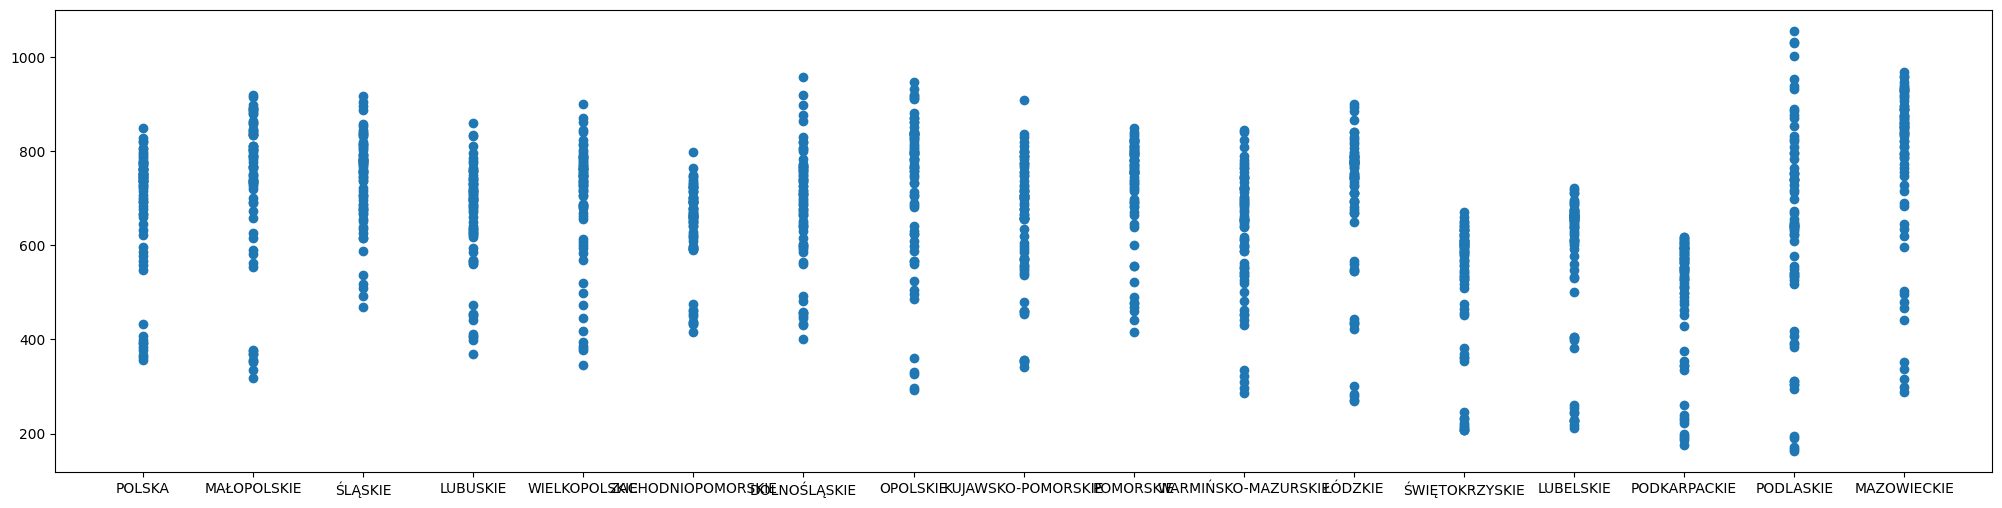

In [12]:
x = df['Jednostka_terytorialna']
y = df['Wartosc']
plt.figure(figsize=(25, 6))
plt.scatter(x, y)

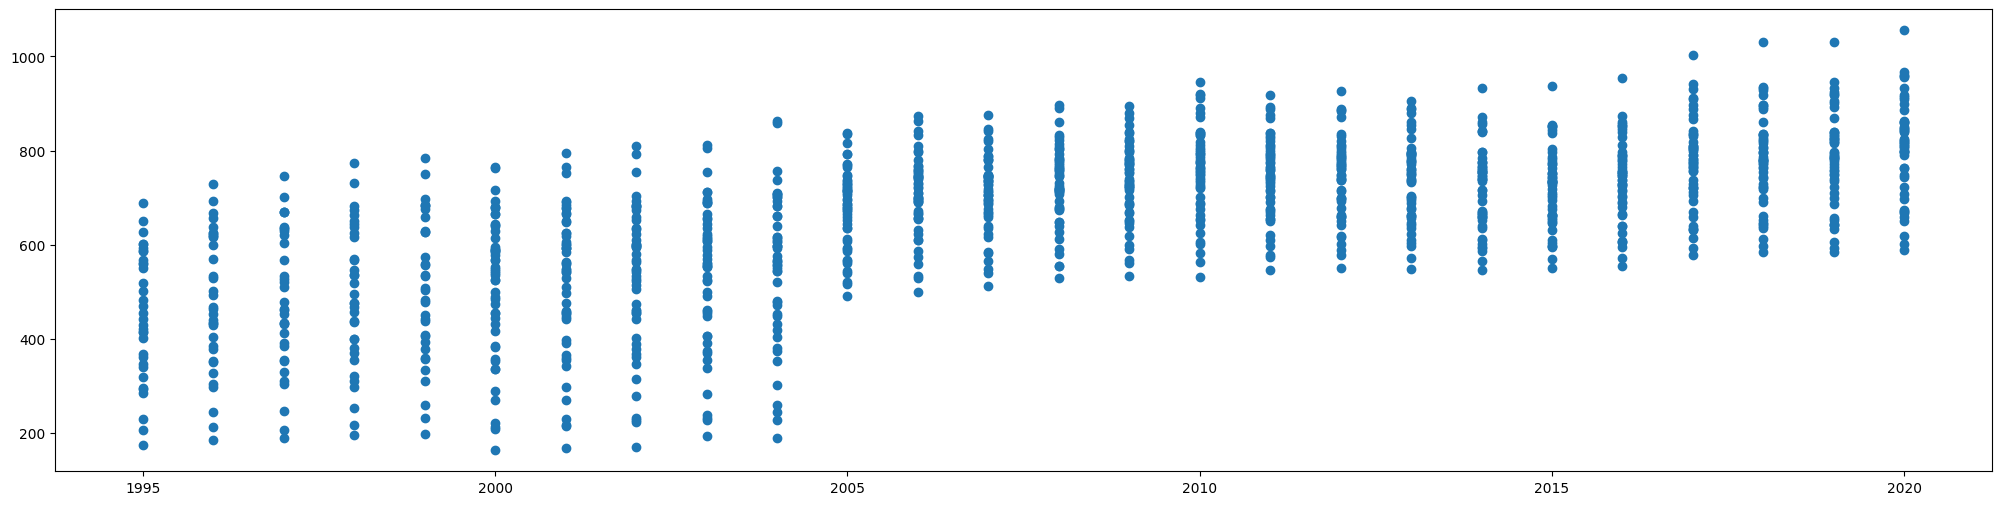

In [13]:
x = df['Rok']
y = df['Wartosc']
plt.figure(figsize=(25, 6))
plt.scatter(x, y)

Przygotowanie danych

In [14]:
#Niepotrzebne kolumny: Flaga, Zmienna, Typ informacji - getting rid of unnecessary columns
df = df[['Charakter_miejscowosci', 'Jednostka_terytorialna', 'Rok', 'Wartosc']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1325
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Charakter_miejscowosci  1241 non-null   object 
 1   Jednostka_terytorialna  1241 non-null   object 
 2   Rok                     1241 non-null   int64  
 3   Wartosc                 1241 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.5+ KB


In [16]:
#Sprawdzenie czy Dtype Charakter i Jednostka to string - making sure type of str columns is right
print(df['Charakter_miejscowosci'].apply(type).unique())
print(df['Jednostka_terytorialna'].apply(type).unique())

[<class 'str'>]
[<class 'str'>]


In [17]:
#Podstawowa statystyka Wartosc - basic statistic
df['Wartosc'].describe()

count    1241.000000
mean      662.969621
std       159.453099
min       163.800000
25%       586.100000
50%       691.900000
75%       773.900000
max      1055.200000
Name: Wartosc, dtype: float64

Analiza - Charakter miejscowości

> Analysis - Locality Character



[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average electricity consumption per capita [kWh]'),
 Text(0.5, 1.0, 'Electricity consumption in cities, rural areas, and overall for the years 1995-2020.')]

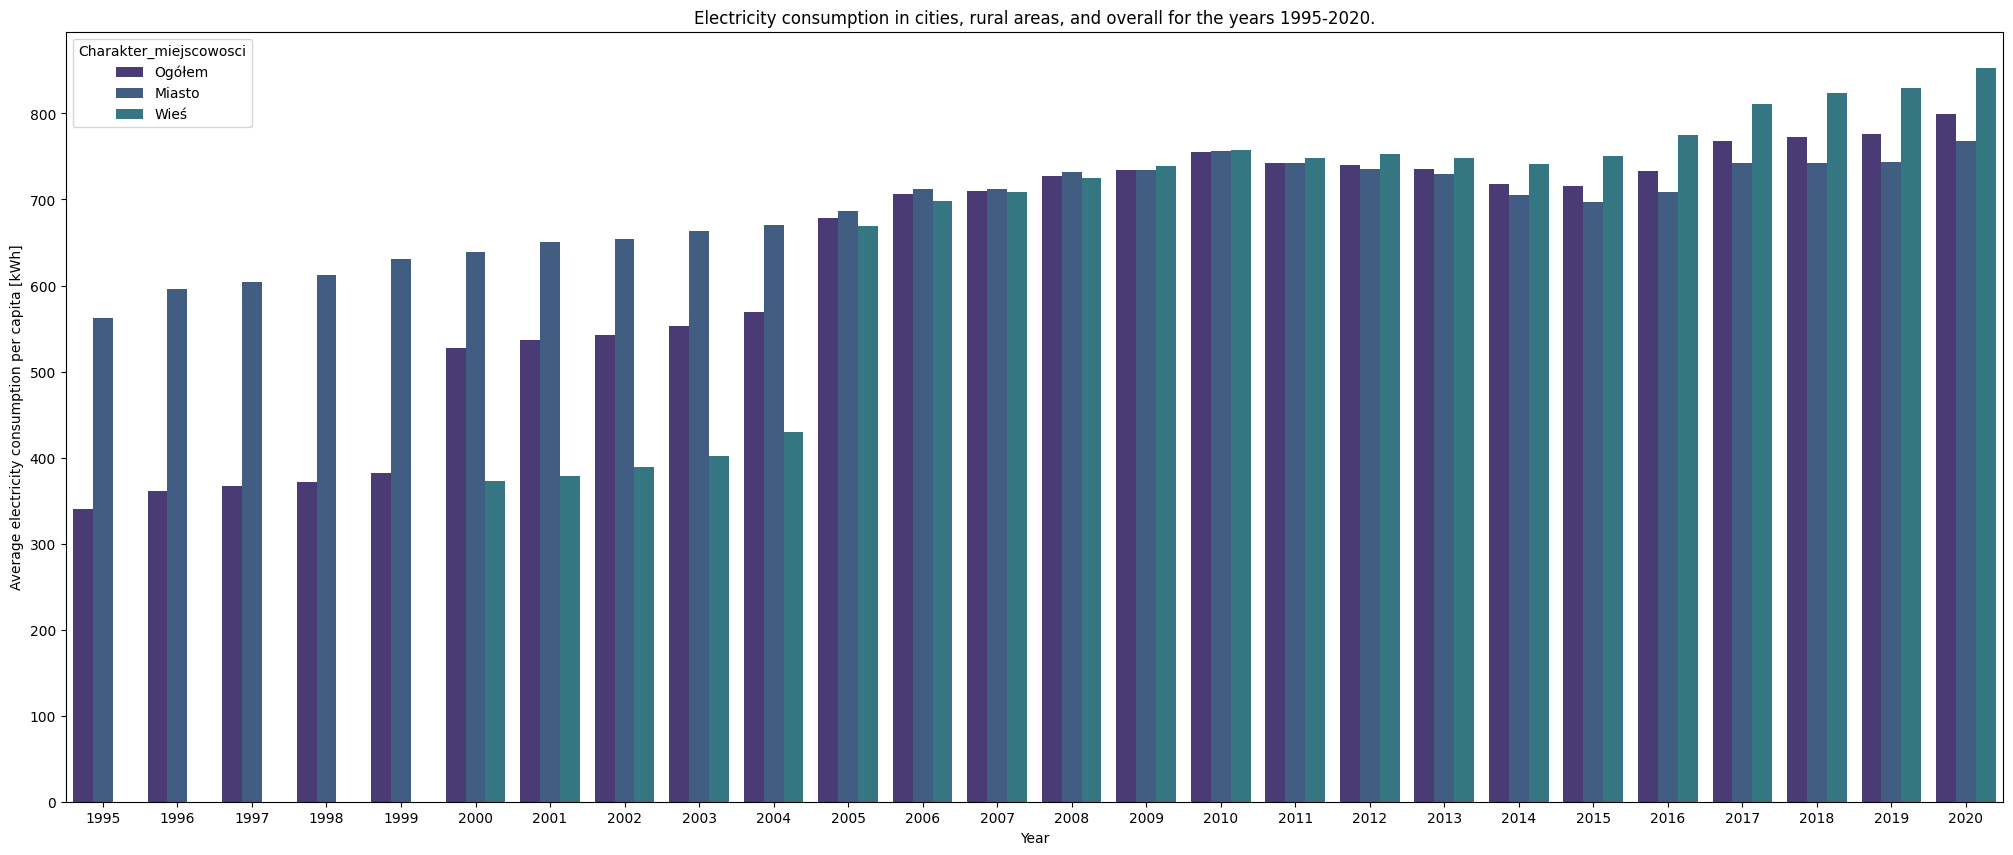

In [18]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=df, x='Rok', y='Wartosc', hue='Charakter_miejscowosci', errorbar=None, palette=sns.color_palette("viridis"))
ax.set(xlabel='Year',
       ylabel='Average electricity consumption per capita [kWh]',
       title='Electricity consumption in cities, rural areas, and overall for the years 1995-2020.')

Analiza - Jednostki terytorialne (województwa)

> Analysis - voivodeship



---



[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average electricity consumption per capita [kWh]'),
 Text(0.5, 1.0, 'Average energy consumption value in the years 1995-2020, in individual voivodeships')]

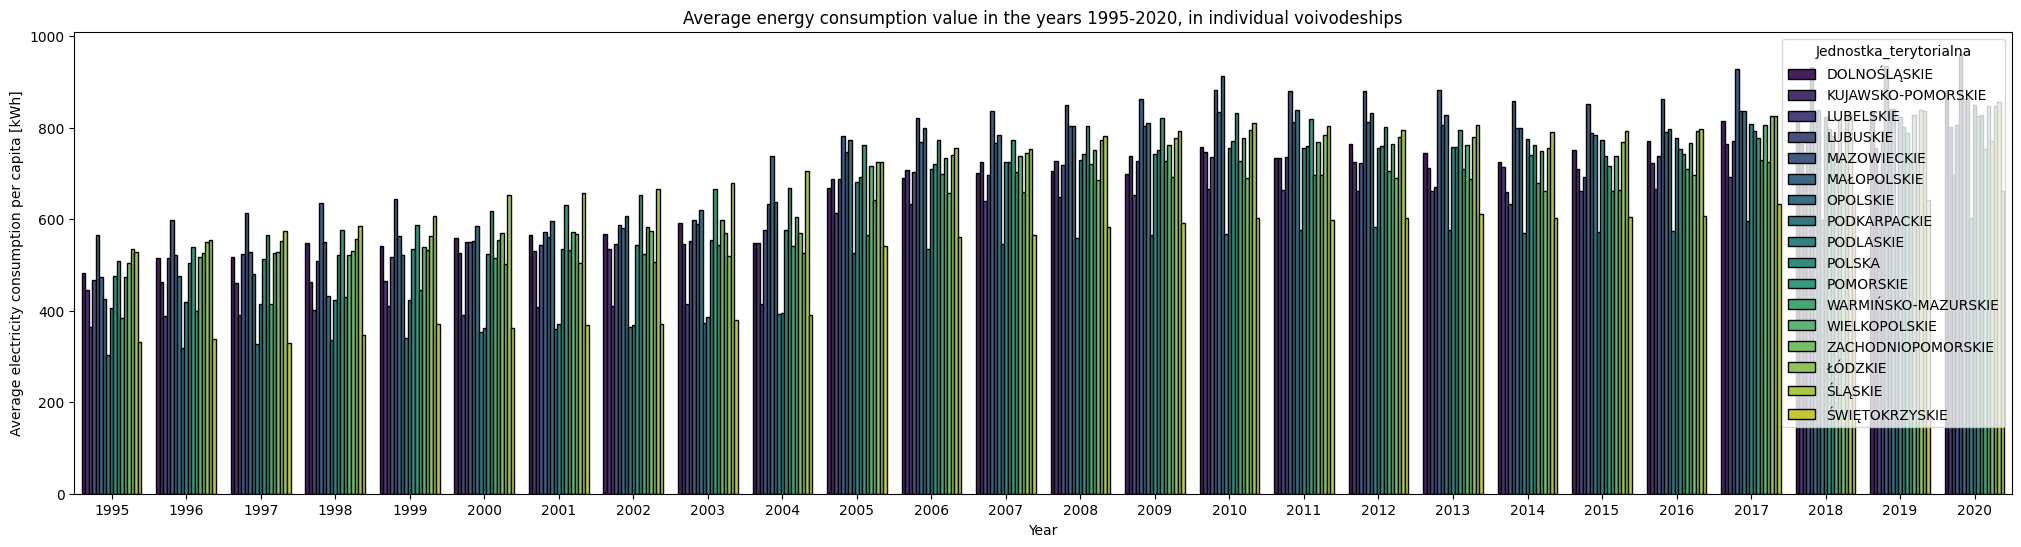

In [19]:
# Grupowanie danych i średnia - data grouping and mean
grouped_df = df.groupby(['Rok', 'Jednostka_terytorialna'])['Wartosc'].mean().reset_index()

# Wykres - plot
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=grouped_df, x='Rok', y='Wartosc', hue='Jednostka_terytorialna', palette='viridis', edgecolor='black', linewidth=1)

ax.set(xlabel='Year',
       ylabel='Average electricity consumption per capita [kWh]',
       title='Average energy consumption value in the years 1995-2020, in individual voivodeships')

In [20]:
# Interaktywny wykres - interactive plot (might be visible only with Colab)
fig = px.bar(grouped_df, x='Rok', y='Wartosc', color='Jednostka_terytorialna', title='Average energy consumption value in the years 1995-2020, in individual voivodeships',
             labels={'Wartosc': 'Average electricity consumption per capita [kWh]', 'Rok': 'Year'})
fig.show()

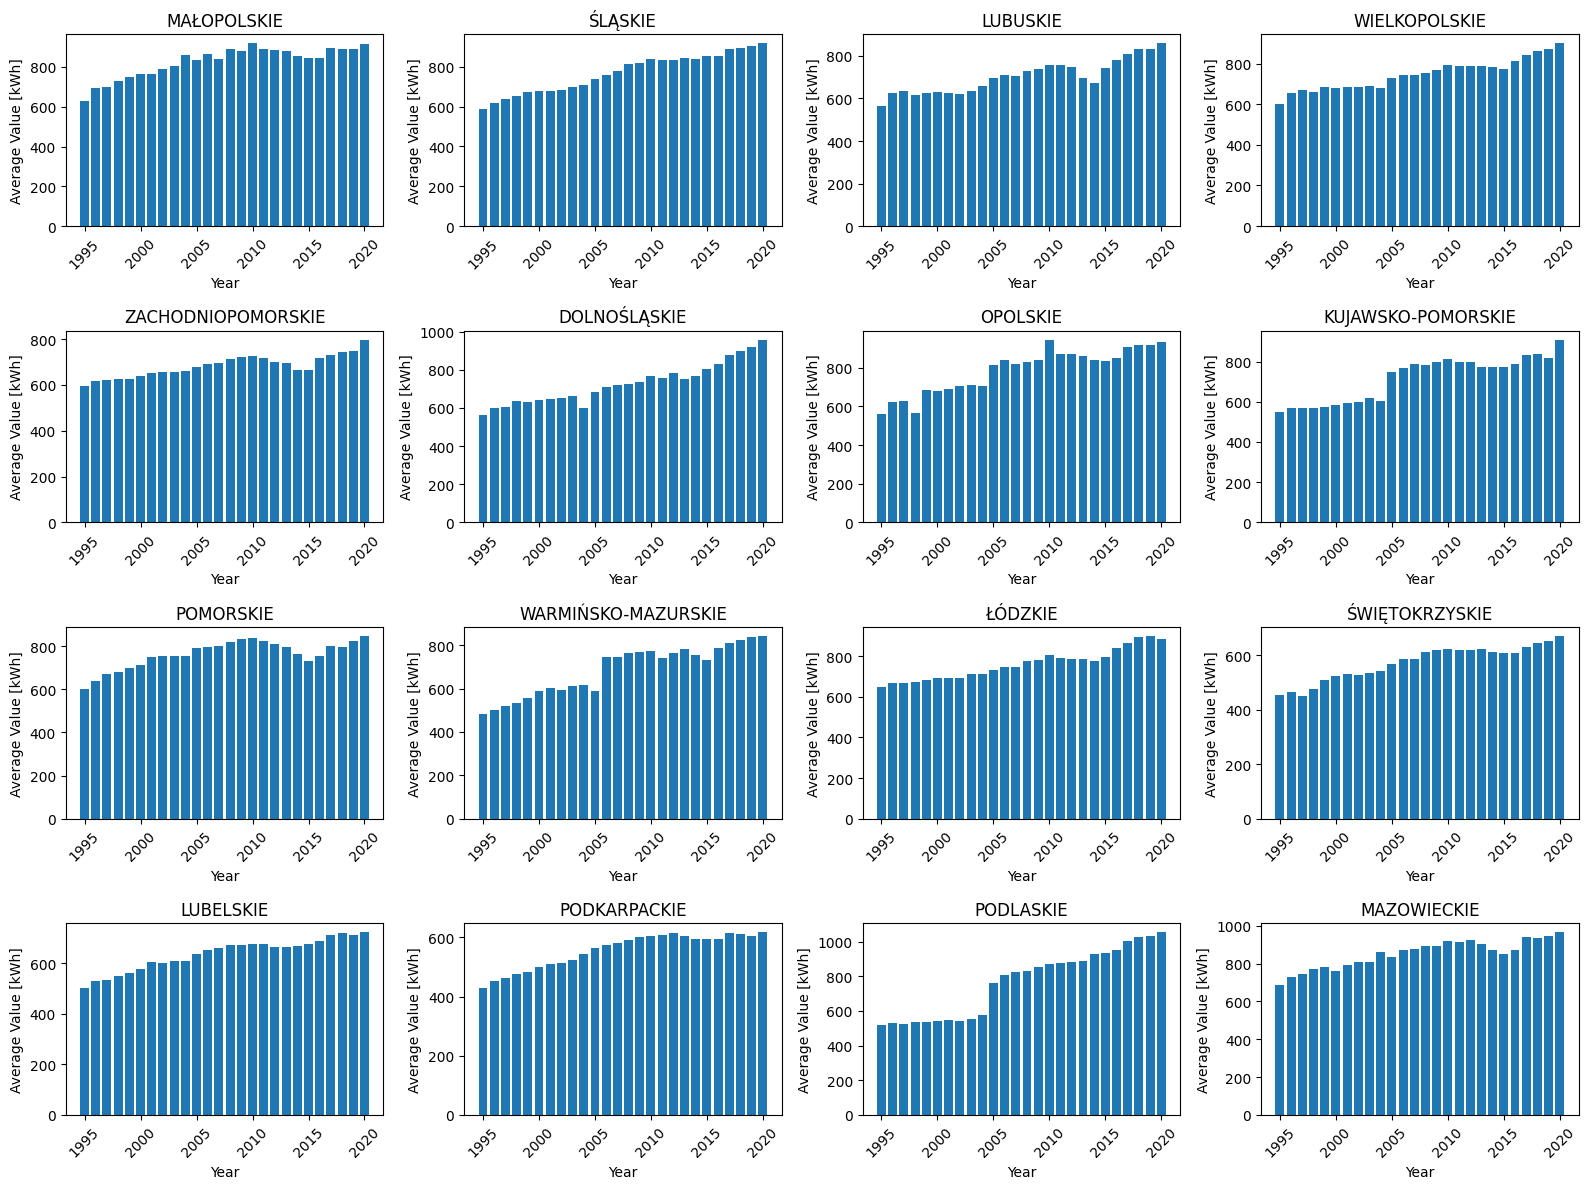

In [21]:
#Summary of each voivodeship

df_filtered = df[df['Jednostka_terytorialna'] != 'POLSKA']
wojewodztwa = df_filtered['Jednostka_terytorialna'].unique()

#Liczba wierszy i kolumn - no. of rows and columns
n_rows = len(wojewodztwa) // 4 + (len(wojewodztwa) % 4 > 0)
n_cols = min(4, len(wojewodztwa))

#Subplot dla każdego województwa - subplot for each voivodeship
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 3 * n_rows))

for i, wojewodztwo in enumerate(wojewodztwa):
    row = i // n_cols
    col = i % n_cols
    subset = df[df['Jednostka_terytorialna'] == wojewodztwo]
    axes[row, col].bar(subset['Rok'], subset['Wartosc'])
    axes[row, col].set_title(wojewodztwo)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Average Value [kWh]')
#Obrót osi x - rotating x axis
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [22]:
#Pivot
df_pivot = df_filtered.pivot_table(index='Rok', columns='Jednostka_terytorialna', values='Wartosc', aggfunc='mean')
df_pivot=df_pivot.round(2)
df_pivot.head()

Jednostka_terytorialna,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBELSKIE,LUBUSKIE,MAZOWIECKIE,MAŁOPOLSKIE,OPOLSKIE,PODKARPACKIE,PODLASKIE,POMORSKIE,WARMIŃSKO-MAZURSKIE,WIELKOPOLSKIE,ZACHODNIOPOMORSKIE,ŁÓDZKIE,ŚLĄSKIE,ŚWIĘTOKRZYSKIE
Rok,,,,,,,,,,,,,,,,
1995,481.25,445.95,365.25,467.60,565.45,473.10,426.35,302.40,406.65,507.95,384.25,473.60,504.15,535.65,528.60,331.25
1996,514.80,461.85,387.35,514.45,597.45,521.60,475.80,319.10,418.95,539.35,399.05,516.95,526.15,550.80,554.70,338.15
1997,517.55,460.85,390.15,524.30,612.95,527.80,480.10,326.95,415.20,565.80,415.10,526.85,527.00,551.35,573.65,329.90
1998,547.95,462.95,400.75,508.50,634.75,550.00,432.55,335.80,423.55,575.60,428.85,522.05,530.60,555.75,584.80,346.90
1999,540.40,465.20,410.25,517.20,644.15,563.95,522.45,340.20,422.40,587.75,445.50,539.70,532.75,562.20,605.90,370.75


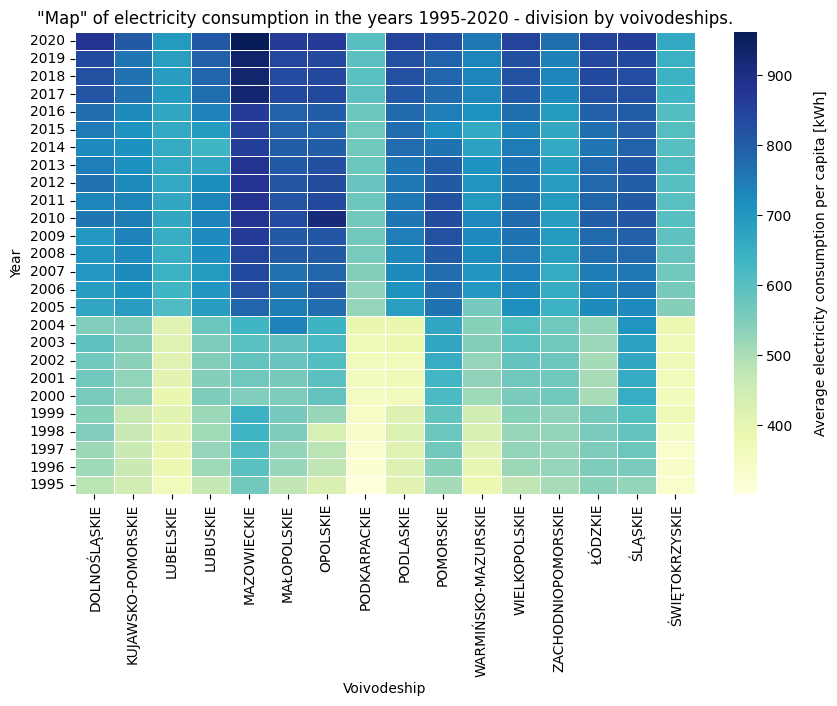

In [25]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_pivot, cmap="YlGnBu", fmt=".2f", linewidths=.5)
heatmap.invert_yaxis()
cbar = heatmap.collections[0].colorbar
cbar.set_label('Average electricity consumption per capita [kWh]', rotation=90, labelpad=15)
plt.title('"Map" of electricity consumption in the years 1995-2020 - division by voivodeships.')
plt.xlabel('Voivodeship')
plt.ylabel('Year')
plt.show()

**Dodanie do analizy danych o liczbie ludności w Polsce** - **Adding population data to the analysis.**

Przygotowanie danych - preprocessing data

In [26]:
df_demografia = pd.read_excel('/content/Demografia_1995-2020.xlsx')
cols = ['Rok', 'Liczba_mieszkancow_Polski'] #Rok - Year, Liczba_mieszkancow_Polski - Population of Poland (1995 - 2020)
df_demografia.columns = cols
df_demografia

,Rok,Liczba_mieszkancow_Polski
0,1995,38284000
1,1996,38294000
2,1997,38290000
3,1998,38277000
4,1999,38263300
5,2000,38254000
6,2001,38242200
7,2002,38218500
8,2003,38190600
9,2004,38173800


In [27]:
df_demografia.isnull().sum()

Rok                          0
Liczba_mieszkancow_Polski    0
dtype: int64

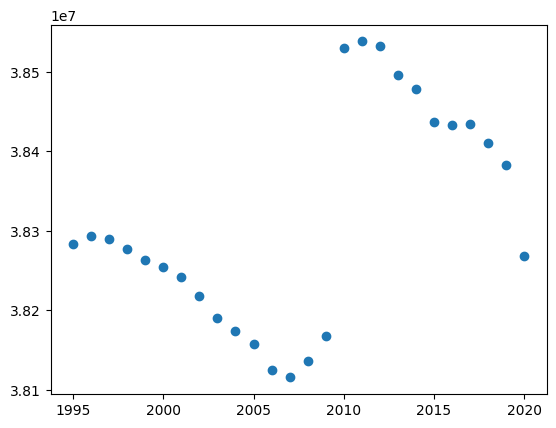

In [28]:
#peak at the data
x = df_demografia['Rok']
y = df_demografia['Liczba_mieszkancow_Polski']
plt.scatter(x, y)

In [29]:
#df z Rok, Wartosc - df with Year and Value
df_dem1 = df.groupby('Rok')['Wartosc'].mean().round(2).reset_index()
df_dem1

,Rok,Wartosc
0,1995,451.41
1,1996,478.79
2,1997,485.73
3,1998,491.96
4,1999,506.16
5,2000,513.16
6,2001,521.82
7,2002,528.58
8,2003,539.72
9,2004,556.56


In [30]:
df_dem1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rok      26 non-null     int64  
 1   Wartosc  26 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 544.0 bytes


In [31]:
#połączenie df_dem1(wyciągnięty z df) z df_demografia - merging dataframes
df_dem = pd.merge(df_dem1, df_demografia, left_on='Rok', right_on='Rok', how='inner')
df_dem

,Rok,Wartosc,Liczba_mieszkancow_Polski
0,1995,451.41,38284000
1,1996,478.79,38294000
2,1997,485.73,38290000
3,1998,491.96,38277000
4,1999,506.16,38263300
5,2000,513.16,38254000
6,2001,521.82,38242200
7,2002,528.58,38218500
8,2003,539.72,38190600
9,2004,556.56,38173800


Wizualizacja - Visualization

In [32]:
#Interaktywny - interactive plot (also visible in Colab)
plt.figure(figsize=(14, 5))
fig = px.bar(df_dem, x='Rok', y='Wartosc', color='Liczba_mieszkancow_Polski', title='Average electricity consumption in the years 1995-2020, along with the population of Poland.',
             labels={'Wartosc': 'Average electricity consumption per capita [kWh]', 'Rok': 'Year', 'Liczba_mieszkancow_Polski':'Population of Poland'}, barmode='stack')
fig.show()

<Figure size 1400x500 with 0 Axes>

**Analiza - województwa - mapa** - **Analysis - voivodeships - map**

Preprocessing data

> Sum



In [33]:
#nowe df ze współrzędnymi województw - new df with coordinates of voivodeships.
df_geo = pd.read_excel('/content/wspolrzedne_srodki_wojewodztw.xlsx')

In [34]:
df_geo = df_geo.sort_values(by='Województwo')
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 12
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Województwo             16 non-null     object 
 1   Szerokość_geograficzna  16 non-null     float64
 2   Długość_geograficzna    16 non-null     float64
dtypes: float64(2), object(1)
memory usage: 512.0+ bytes


In [35]:
#wyciągnięcie danych z df - aquiring data from df
df_map1 = df.groupby('Jednostka_terytorialna')['Wartosc'].sum().reset_index()
df_map1 = df_map1.drop(9)
df_map1.info()
df_map1.reset_index(drop=True)
df_map1 = df_map1[['Jednostka_terytorialna', 'Wartosc']]
df_map1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 16
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jednostka_terytorialna  16 non-null     object 
 1   Wartosc                 16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


,Jednostka_terytorialna,Wartosc
0,DOLNOŚLĄSKIE,49874.6
1,KUJAWSKO-POMORSKIE,47827.8
2,LUBELSKIE,41772.4
3,LUBUSKIE,48175.8
4,MAZOWIECKIE,56918.5
5,MAŁOPOLSKIE,53033.3
6,OPOLSKIE,53219.8
7,PODKARPACKIE,36180.8
8,PODLASKIE,46532.4
10,POMORSKIE,52975.2


In [36]:
#Porządkowanie df_map1 - sorting
df_map1 = df_map1.sort_values(by='Jednostka_terytorialna')
df_map1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 16
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jednostka_terytorialna  16 non-null     object 
 1   Wartosc                 16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


In [37]:
#Połączenie df - merging both dfs
df_map = pd.merge(df_map1, df_geo, left_on='Jednostka_terytorialna', right_on='Województwo', how='inner')
df_map = df_map[['Jednostka_terytorialna', 'Wartosc', 'Szerokość_geograficzna', 'Długość_geograficzna']]
cols = ['Jednostka_terytorialna', 'Wartosc', 'Szerokosc_geograficzna', 'Długosc_geograficzna']
#Jednostka_terytorialna - Voievodeship, Wartosc - Value, Szerokosc_geograficzna - Latitude, Długosc_geograficzna - Longitude
df_map.columns = cols
df_map

,Jednostka_terytorialna,Wartosc,Szerokosc_geograficzna,Długosc_geograficzna
0,DOLNOŚLĄSKIE,49874.6,51.1101,16.8534
1,KUJAWSKO-POMORSKIE,47827.8,53.0685,18.8122
2,LUBELSKIE,41772.4,51.1667,22.5667
3,LUBUSKIE,48175.8,51.9356,15.4996
4,MAZOWIECKIE,56918.5,52.3476,20.6504
5,MAŁOPOLSKIE,53033.3,49.9480,19.9878
6,OPOLSKIE,53219.8,50.6731,17.9220
7,PODKARPACKIE,36180.8,49.9881,22.0658
8,PODLASKIE,46532.4,53.1291,23.1495
9,POMORSKIE,52975.2,54.4303,18.4979


Wizualizacja - Visualization

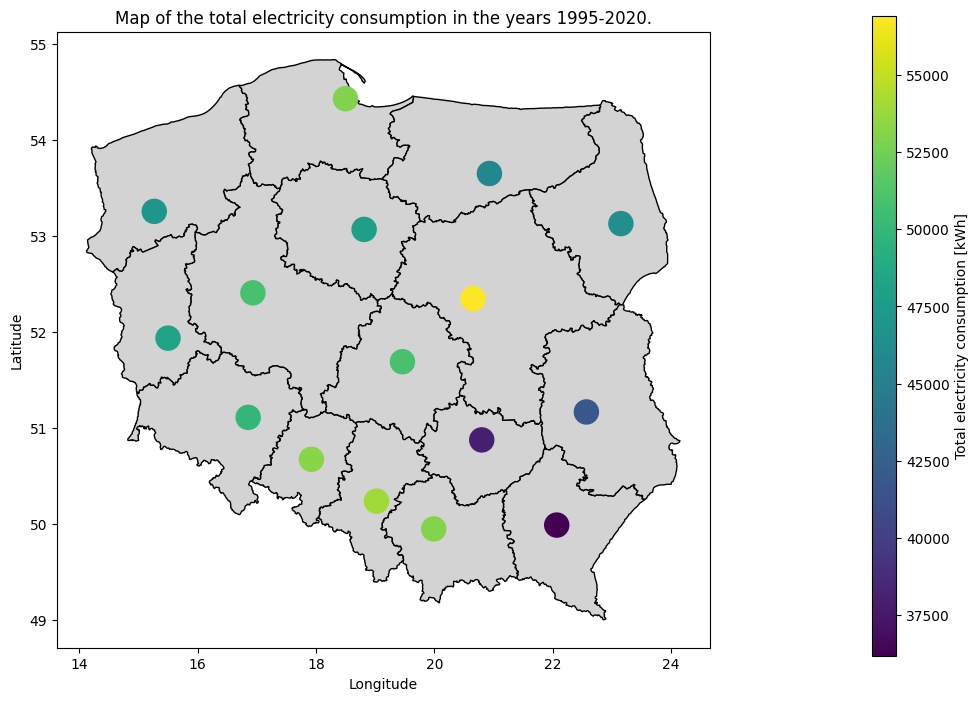

In [38]:
#mapa - geojson - map file
pl_map = gpd.read_file('/content/wojewodztwa-min.geojson')

#Wykres - plot
fig, ax = plt.subplots(figsize=(12, 8))

#Mapę Polski - adding map of Poland
pl_map.plot(ax=ax, color='lightgray', edgecolor='black')

#Dane do umaly - data with coordinates
ax.scatter(df_map['Długosc_geograficzna'], df_map['Szerokosc_geograficzna'], c=df_map['Wartosc'],cmap='viridis', s=300, alpha=1, label='Dane')

# Ustawienia etykiet i tytułu - Labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Map of the total electricity consumption in the years 1995-2020.')

# Dodaj colorbar obok wykresu - colorbar
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Położenie i rozmiar colorbaru - colorbar settings
cbar = ColorbarBase(cax, cmap='viridis', norm=Normalize(vmin=df_map['Wartosc'].min(), vmax=df_map['Wartosc'].max()))
cbar.set_label('Total electricity consumption [kWh]')


# Wyświetl wykres
plt.show()

Przetwarzanie danych - further data processing

---



<Axes: >

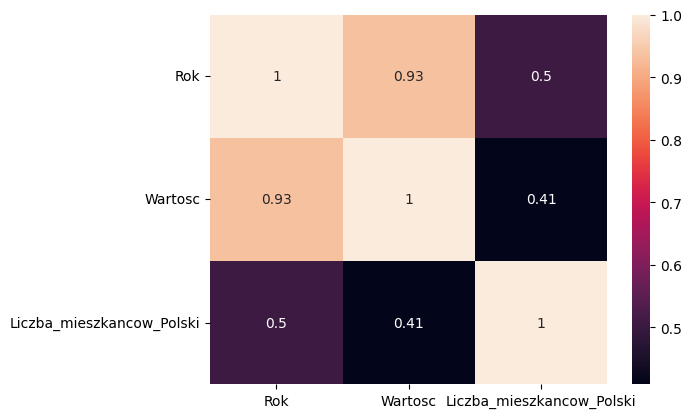

In [39]:
#Połączenie danych - merging data
df_dem = pd.merge(df_dem1, df_demografia, left_on='Rok', right_on='Rok', how='inner')

#Heatmap korelacji - Heatmap correlation
sns.heatmap(df_dem[['Rok', 'Wartosc','Liczba_mieszkancow_Polski']].corr(),annot=True)

In [40]:
#Podział danych - dividing data
X = df_dem[['Rok', 'Liczba_mieszkancow_Polski']] #Year, Population of Poland
y = df_dem['Wartosc'] #Value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#Model
model = LinearRegression()
#Trenowanie modelu - training
model.fit(X_train, y_train)

LinearRegression()

In [42]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

# Przewidywanie na zbiorze testowym - predicting on test data
y_pred = model.predict(X_test)

# Ocena modelu - MSE i R2 - evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.3f}, R2: {r:.3f}')

Mean Squared Error: 2535.633, R2: 0.935


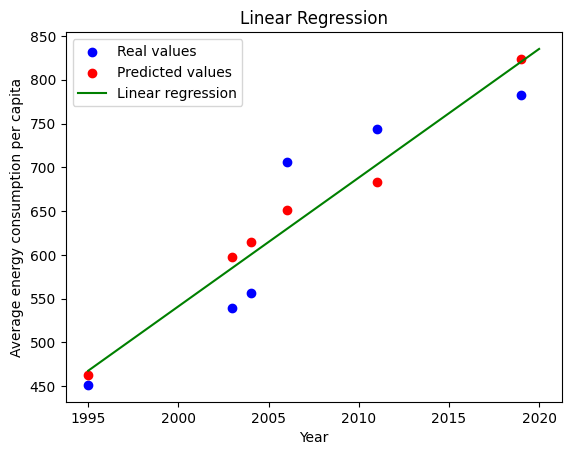

In [43]:
# Wizualizacja rzeczywistych vs przewidywanych wartości - Visualization of real vs predicted data
plt.scatter(X_test['Rok'], y_test, color='blue', label='Real values')
plt.scatter(X_test['Rok'], y_pred, color='red', label='Predicted values')
plt.plot(x, mymodel, color='green', label='Linear regression')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Average energy consumption per capita')
plt.legend()
plt.show()

In [50]:
#Sprawdzenie dla 1996 roku - Checking for year 1996
linear_prediction = model.predict([[1996, 38294000]])
linear_prediction = np.round(np.array(linear_prediction), 2)
true_value = df_dem[df_dem['Rok'] == 1996]['Wartosc']
true_value = np.array(true_value)
print(f'Predicted average consumption for year 1996: {linear_prediction} kWh\nReal average consumption for year 1996:{true_value} kWh')

Predicted average consumption for year 1996: [476.84] kWh
Real average consumption for year 1996:[478.79] kWh


In [51]:
#Predykcja na 2024 rok - Prediction for year 2024
pred_2024 = model.predict([[2024, 37766000]])
pred_2024 = np.round(pred_2024,2)
print(f'Predicted average consumption for year 2024: {pred_2024} kWh')

Predicted average consumption for year 2024: [970.02] kWh
